In [1]:
# standard python utilities
import os
import sys
import glob
import pandas as pd
import numpy as np
import calendar
import time

# standard python plotting utilities
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# standard geospatial python utilities
import pyproj # for converting proj4string
import shapely
import geopandas as gpd
# import rasterio

# mapping utilities
# import contextily as ctx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from matplotlib.ticker import MaxNLocator

import flopy
import flopy.utils.binaryfile as bf


In [2]:
git_dir = os.getcwd()
while os.path.basename(git_dir) != 'GitHub':
    git_dir = os.path.dirname(git_dir)
usr_dir = os.getcwd()
while os.path.basename(usr_dir) != 'Users':
    temp = os.path.basename(usr_dir)
    usr_dir = os.path.dirname(usr_dir)
usr_dir += '/'+temp

py_dir = git_dir +'/CosumnesRiverRecharge/python_utilities/'
## Set up directory referencing
# Package data
gwfm_dir = usr_dir+'/Box/research_cosumnes/GWFlowModel'
plt_dir = gwfm_dir+'/Levee_setback/figures/'
gwfm_dir


'C:\\Users/ajcalder/Box/research_cosumnes/GWFlowModel'

## Pick model type to review
RIV is the simple model with only SS assumptions about Blodgett Dam depth and area
LAK is the complex model with interactive flow between the stream and Blodgett Dam

In [3]:
model_type = 'RIV'
# model_type = 'LAK'

In [5]:
# run_dir = 'C://WRDAPP/GWFlowModel'
run_dir = 'F://WRDAPP/GWFlowModel'
loadpth = run_dir +'/Cosumnes/levee_setback/streamflow/'

runs = os.listdir(loadpth)
runs

['historical_SS', 'historical_streamflow']

In [6]:
# model_ws =loadpth+'/actual_200cfs'

# i=0
# os.listdir(loadpth+runs[i])
# glob.glob(loadpth+runs[i]+'/*.nam')[0]
# model_ws = loadpth+runs[i]


# model_ws = loadpth+'historical_streamflow'
model_ws = loadpth+'historical_SS'


In [7]:

m = flopy.modflow.Modflow.load('MF.nam', model_ws= model_ws, 
                                exe_name='mf2005', version='mf2005')

In [8]:
sfr_dir = gwfm_dir+'/SFR_data/'
grid_sfr = gpd.read_file(sfr_dir+'/final_grid_sfr/grid_sfr.shp')
m_domain = gpd.read_file(gwfm_dir+'\\NewModelDomain\\GWModelDomain_52_9deg_UTM10N_WGS84.shp')
grid_p = gpd.read_file(gwfm_dir+'/DIS_data/grid/grid.shp')


C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
def plot_head_simple(model, hdobj, cbb, spd_stp,time, name, ax, hk,units):
    hd_step = 5
    if units =='ft':
        fact = 0.3048
    elif units== 'm':
        fact=1
    head = hdobj.get_data(kstpkper = spd_stp)/fact
    levels_hmax = np.round(np.max(head[head!=1E+30/fact]),-1)
    levels_hmin = np.round(np.min(head[head>=-200/fact]),-1)
    levels = np.arange(levels_hmin, levels_hmax, int(hd_step/fact))


    ax.set_title(name+' Head Contours at '+ str(time))
    mapview = flopy.plot.PlotMapView(model=model,ax=ax)

    contour_set = mapview.contour_array(head, masked_values=[-999.99], levels=levels, ax=ax)
    hcb = plt.colorbar(contour_set, shrink = 0.5,ax=ax)
    hcb.set_label('Head ('+units+')')
    ax.clabel(contour_set, contour_set.levels[0::2], inline=True, fontsize=8)


    # plot the horizontal hydraulic conductivities
    if hk == True:
        a = model.lpf.hk.array
        csa = mapview.plot_array(a, norm=mpl.colors.LogNorm())
        cb = plt.colorbar(csa, shrink=0.75,ax=ax)
        cb.set_label('Horiz. Cond. (m/d)')
    # Plots boundary condtiions
#     quadmesh = mapview.plot_ibound(ax=ax)
    mapview.plot_bc("GHB", plotAll=True,ax=ax)
    mapview.plot_bc("SFR", plotAll=True,ax=ax)
    mapview.plot_bc("CHD", plotAll=True,ax=ax)
    mapview.plot_bc("WEL", plotAll=True,ax=ax,alpha=0.1, color='red')

#     quiver = mapview.plot_discharge(frf, fff, istep=10, jstep=10)  # no head array for volumetric discharge
    ax.ticklabel_format(style='plain')
#     linecollection = mapview.plot_grid(linewidths = 0.3,ax=ax)
    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Northing (m)')
#     fig.tight_layout()

In [10]:
def plot_dtw_simple(model, hdobj, cbb, spd_stp,time, name, ax, hk,units):
    hd_step = 10
    if units =='ft':
        fact = 0.3048
    elif units== 'm':
        fact=1
    head = hdobj.get_data(kstpkper = spd_stp)/fact
    dtw = model.dis.top.array-head
    levels_dtw_max = np.round(np.max(dtw[head!=1E+30/fact]),-1)
    # filter out dtw greater than 300 because of mountain ranges
#     levels_dtw_max = 300
    levels_dtw_hmin = np.round(np.min(dtw[head>=-200/fact]),-1)
#     levels_dtw_hmin = -300
        #     frf = cbb.get_data(text='FLOW RIGHT FACE')[0]
    #     fff = cbb.get_data(text='FLOW FRONT FACE')[0]

    levels = np.arange(levels_dtw_hmin, levels_dtw_max, int(hd_step/fact))

    ax.set_title(name+' DTW Contours at '+ str(time))
    mapview = flopy.plot.PlotMapView(model=model,ax=ax)
    
    contour_set = mapview.contour_array(dtw, masked_values=[-999.99], levels=levels, ax=ax)
    hcb = plt.colorbar(contour_set, shrink = 0.5,ax=ax)
    hcb.set_label('DTW ('+units+')')
    ax.clabel(contour_set, contour_set.levels[0::2], inline=True, fontsize=8)
#     ax.clabel(contour_set, contour_set.levels[0::2], inline=True, fontsize=8)

    # plot the horizontal hydraulic conductivities
    if hk == True:
        a = model.lpf.hk.array
        csa = mapview.plot_array(a, norm=mpl.colors.LogNorm())
        cb = plt.colorbar(csa, shrink=0.75,ax=ax)
        cb.set_label('Horiz. Cond. (m/d)')
    # Plots boundary condtiions
#     quadmesh = mapview.plot_ibound(ax=ax)
    mapview.plot_bc("SFR", plotAll=True,ax=ax)
    mapview.plot_bc("GHB", plotAll=True,ax=ax)
    mapview.plot_bc("CHD", plotAll=True,ax=ax)
    mapview.plot_bc("WEL", plotAll=True,ax=ax,alpha=0.1, color='red')

    
#     quiver = mapview.plot_discharge(frf, fff, istep=10, jstep=10)  # no head array for volumetric discharge
    ax.ticklabel_format(style='plain')
#     linecollection = mapview.plot_grid(linewidths = 0.3,ax=ax)
    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Northing (m)')


# Model Simulated-Observed Fit

In [40]:
hdobj = flopy.utils.HeadFile(model_ws+'/MF.hds')
spd_stp = hdobj.get_kstpkper()
times = hdobj.get_times()
cbc = model_ws+'/MF.cbc'


In [41]:
hobout = pd.read_csv(model_ws+'/MF.hob.out',delimiter='\s+', header = 0,names = ['sim_val','WSE','obs_nam'],
                     dtype = {'sim_val':float,'obs_val':float,'obs_nam':object})
# if only one obs exists correct naming convention
one_obs = ~hobout.obs_nam.str.contains('.0')
hobout.loc[one_obs,'obs_nam'] = hobout.loc[one_obs,'obs_nam']+'.'+str(1).zfill(5)

<>:1: DeprecationWarning: invalid escape sequence \s
<>:1: DeprecationWarning: invalid escape sequence \s
<>:1: DeprecationWarning: invalid escape sequence \s
C:\Users\ajcalder\AppData\Local\Temp/ipykernel_52732/76628971.py:1: DeprecationWarning: invalid escape sequence \s
  hobout = pd.read_csv(model_ws+'/MF.hob.out',delimiter='\s+', header = 0,names = ['sim_val','WSE','obs_nam'],


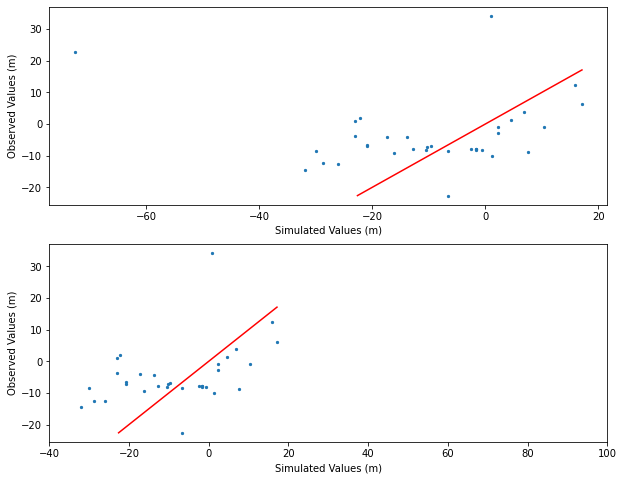

In [42]:
fig, ax = plt.subplots(2,1,figsize=(10,8))

# get boundary values for plotting a 1:1
hobmax = hobout.loc[:,['sim_val','WSE']].max().min()
hobmin = hobout.loc[:,['sim_val','WSE']].min().max()

# plot observed vs simulated values
hobout.plot.scatter(x='sim_val',y='WSE',marker='.',ax=ax[0])
ax[0].plot([hobmin,hobmax],[hobmin,hobmax],'red')
ax[0].set_ylabel('Observed Values (m)')
ax[0].set_xlabel('Simulated Values (m)')

hobout.plot.scatter(x='sim_val',y='WSE',marker='.',ax=ax[1])
ax[1].set_xlim(-40,100)

# plot 1:1 line
ax[1].plot([hobmin,hobmax],[hobmin,hobmax],'red')

plt.ylabel('Observed Values (m)')
plt.xlabel('Simulated Values (m)')

fig_nam = plt_dir+'GSP_WaterBudget/sim_vs_obs_heads'

# plt.savefig(fig_nam+'.png',dpi=600,bbox_inches='tight')
# plt.savefig(fig_nam+'.svg',dpi=600,bbox_inches='tight')

In [44]:
all_obs = pd.read_csv(model_ws+'/input_data/all_obs_grid_prepared.csv')


In [45]:
grid_p['easting'] = grid_p.geometry.centroid.x
grid_p['northing'] = grid_p.geometry.centroid.y

In [46]:
obs_data = hobout.join(all_obs.set_index('obs_nam'),on=['obs_nam'])
obs_data = obs_data.dropna(subset=['node'])
obs_data.loc[:,['row','column','node']] = obs_data.loc[:,['row','column','node']].astype(int)

# obs_data.index = obs_data.index
obs_grid = obs_data.join(grid_p.set_index(['row','column']).loc[:,['easting','northing']], 
                         on=['row','column'])
# # convert back to geospatial
hob_gpd = gpd.GeoDataFrame(obs_grid, geometry = gpd.points_from_xy(obs_grid.easting, obs_grid.northing))
hob_gpd['error'] = hob_gpd.WSE - hob_gpd.sim_val
hob_gpd['abs_error'] = hob_gpd.error.abs()
# set date


In [47]:
if 'MSMT_DATE' in hob_gpd.columns:
    hob_gpd = hob_gpd.set_index('MSMT_DATE')
    hob_gpd.index = pd.to_datetime(hob_gpd.index)    
#     groupby values by season
    hob_gpd.loc[(hob_gpd.index.month > 2)&(hob_gpd.index.month < 6),'season'] = 'spring'
    hob_gpd.loc[(hob_gpd.index.month > 8)&(hob_gpd.index.month < 12),'season'] = 'fall'
    
    hob_seasonal = hob_gpd.groupby(['node','season']).mean()
    hob_seasonal = gpd.GeoDataFrame(hob_seasonal, geometry = gpd.points_from_xy(hob_seasonal.easting, hob_seasonal.northing))
    hob_seasonal = hob_seasonal.reset_index()

In [81]:
hob_interest = hob_gpd.loc[hob_gpd.node.isin([14644, 15343, 16963])]
print('Simulated DTW (ft): ',(hob_interest.dem_elev - hob_interest.sim_val).values/0.3048)
hob_interest

Simulated DTW (ft):  [ 90.23921728  93.01418039 106.83576492]


sim_val     WSE       obs_nam  Unnamed: 0           SITE_CODE       GWE  \
20   7.488512 -8.8720  N14644.00001        20.0  384444N1211868W001 -8.871951   
21  10.446804 -0.9942  N15343.00001        21.0  384526N1211695W001 -0.994218   
23  17.120957  6.2532  N16963.00001        23.0  384600N1211432W001  6.253181   

      WLM_GSE   node  row  column   dem_elev  dem_wlm_gse  wse_m_adj  spd  \
20  32.378049  14644   63     153  34.993425     2.615376  -6.256575  0.0   
21  37.917683  15343   66     162  38.797526     0.879843  -0.114375  0.0   
23  43.408537  16963   73     172  49.684499     6.275962  12.529143  0.0   

          easting      northing                        geometry      error  \
20  657915.964232  4.256550e+06  POINT (657915.964 4256550.370) -16.360512   
21  659480.288903  4.257624e+06  POINT (659480.289 4257624.096) -11.441004   
23  661803.322310  4.258375e+06  POINT (661803.322 4258374.773) -10.867757   

    abs_error  
20  16.360512  
21  11.441004  
23  10.867757

The error is slightly smaller than presented because I used the raw GWE which is based on the surveyed land surface elevation instead of the adjusted water surface elevation based on the model top elevation. Additionally these three wells are in a part of the basin with grassland/pasture that I was not simulating for pumping because it was such a large portion of the domain and it is difficult to know whether it is irrigated or not. It may need to be adjusted to allow pumping on pasture when it is near a domestic or agricultural well (say a radius of 1000 ft or 300 m). South of the Cosumnes water levels tend to be even lower than on the north side where perhaps Deer Creek provides more recharge.

<AxesSubplot:>

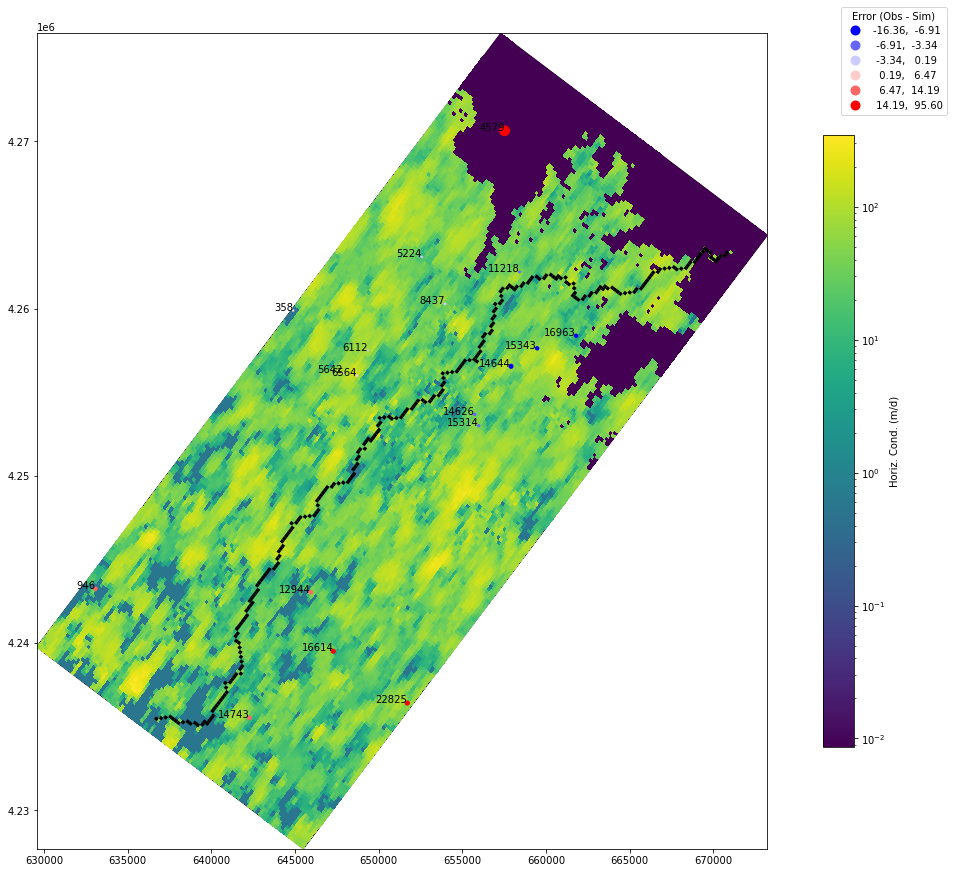

In [59]:
fig,ax=plt.subplots(figsize=(20, 15))

m_domain.plot(ax=ax,color='None')
mapview = flopy.plot.PlotMapView(model=m,ax=ax)
a = m.lpf.hk.array

csa = mapview.plot_array(a[0,:,:], norm=mpl.colors.LogNorm())
cb = plt.colorbar(csa, shrink=0.75,ax=ax)
cb.set_label('Horiz. Cond. (m/d)')

# hob_gpd.plot('error',scheme='EqualInterval', k= 6, ax=ax,legend=True,cmap='magma')
hob_gpd.plot('error',markersize='abs_error',scheme='Quantiles', k = 6, ax=ax,
                  legend=True,cmap='bwr',legend_kwds={'loc':(1.1,0.9),'title':'Error (Obs - Sim)'})
hob_gpd.apply(lambda x: ax.annotate(str(x.node), xy=x.geometry.centroid.coords[0], ha='right'),axis=1);

grid_sfr.plot(ax=ax,color='black')
# ax.legend(loc=(1,0.5))

In [19]:
# hob_seasonal.loc[hob_seasonal.season=='spring'].plot('error',markersize='abs_error',scheme='Quantiles', k = 6,
#                   legend=True,cmap='bwr',legend_kwds={'loc':(1.1,0.8),'title':'Error (Obs - Sim)'})
# hob_seasonal.loc[hob_seasonal.season=='fall'].plot('error',markersize='abs_error',scheme='Quantiles', k = 6,
#                   legend=True,cmap='bwr',legend_kwds={'loc':(1.1,0.8),'title':'Error (Obs - Sim)'})

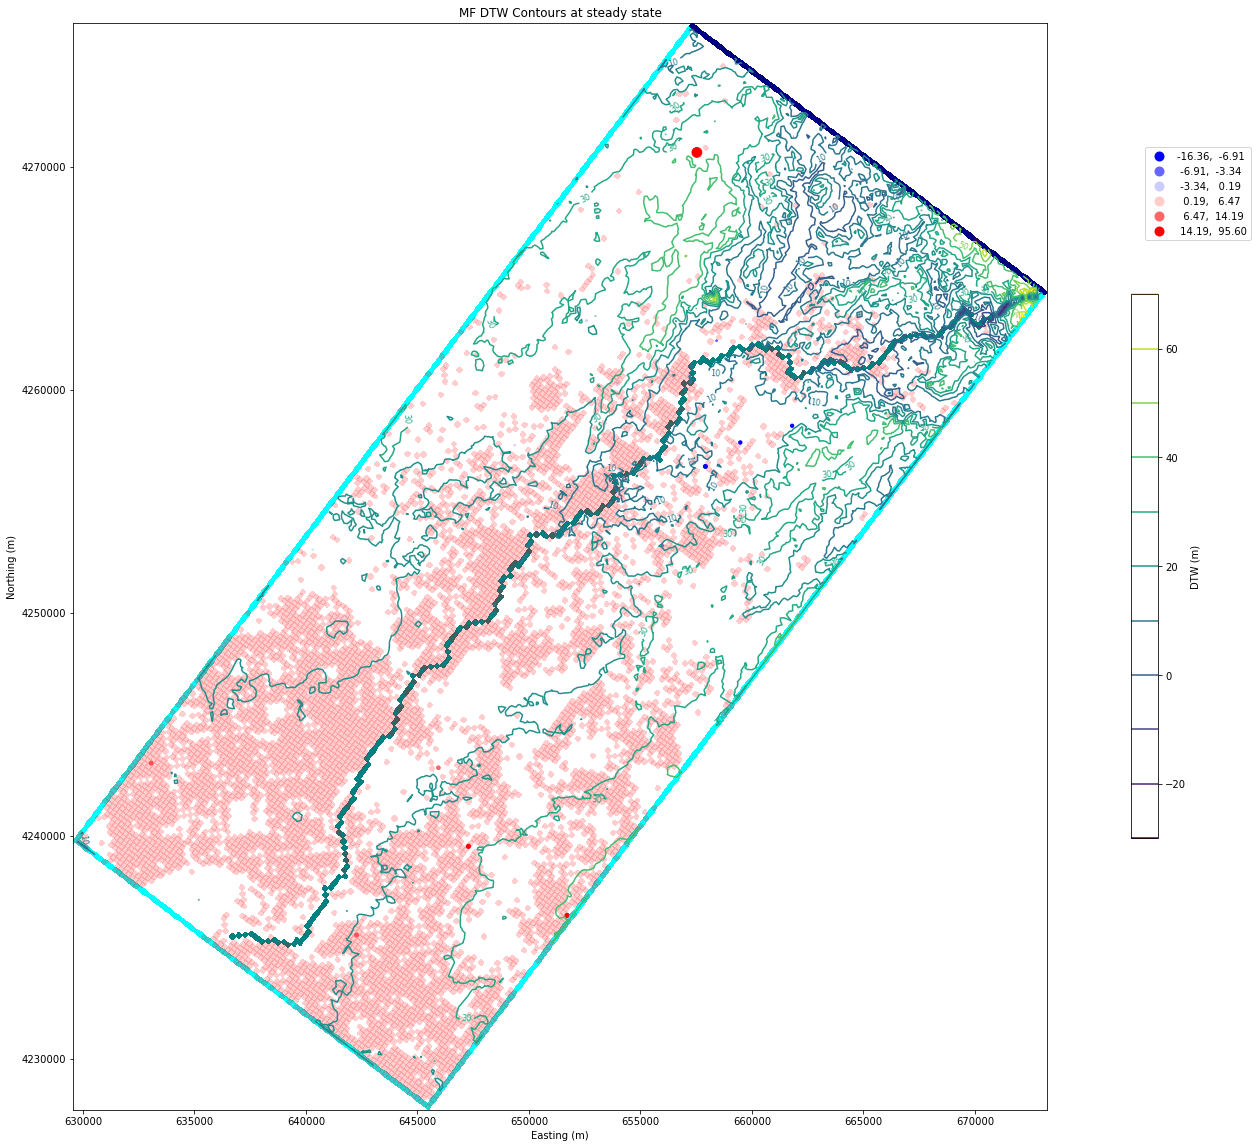

In [55]:
fig,ax = plt.subplots(figsize=(30, 20))
# plot_head(hdobj,cbb, spd_stp[180], 'Steady State',hk=False)

hob_gpd.plot('error',markersize='abs_error',scheme='Quantiles', k = 6, ax=ax,
                  legend=True,cmap='bwr',legend_kwds={'loc':(1.1,0.8)})
# plot_head_simple(m, hdobj, cbc, spd_stp[0], 'steady state', 'MF',ax=ax,hk=False,units='m')
plot_dtw_simple(m, hdobj, cbc, spd_stp[0], 'steady state', 'MF',ax=ax,hk=False,units='m')


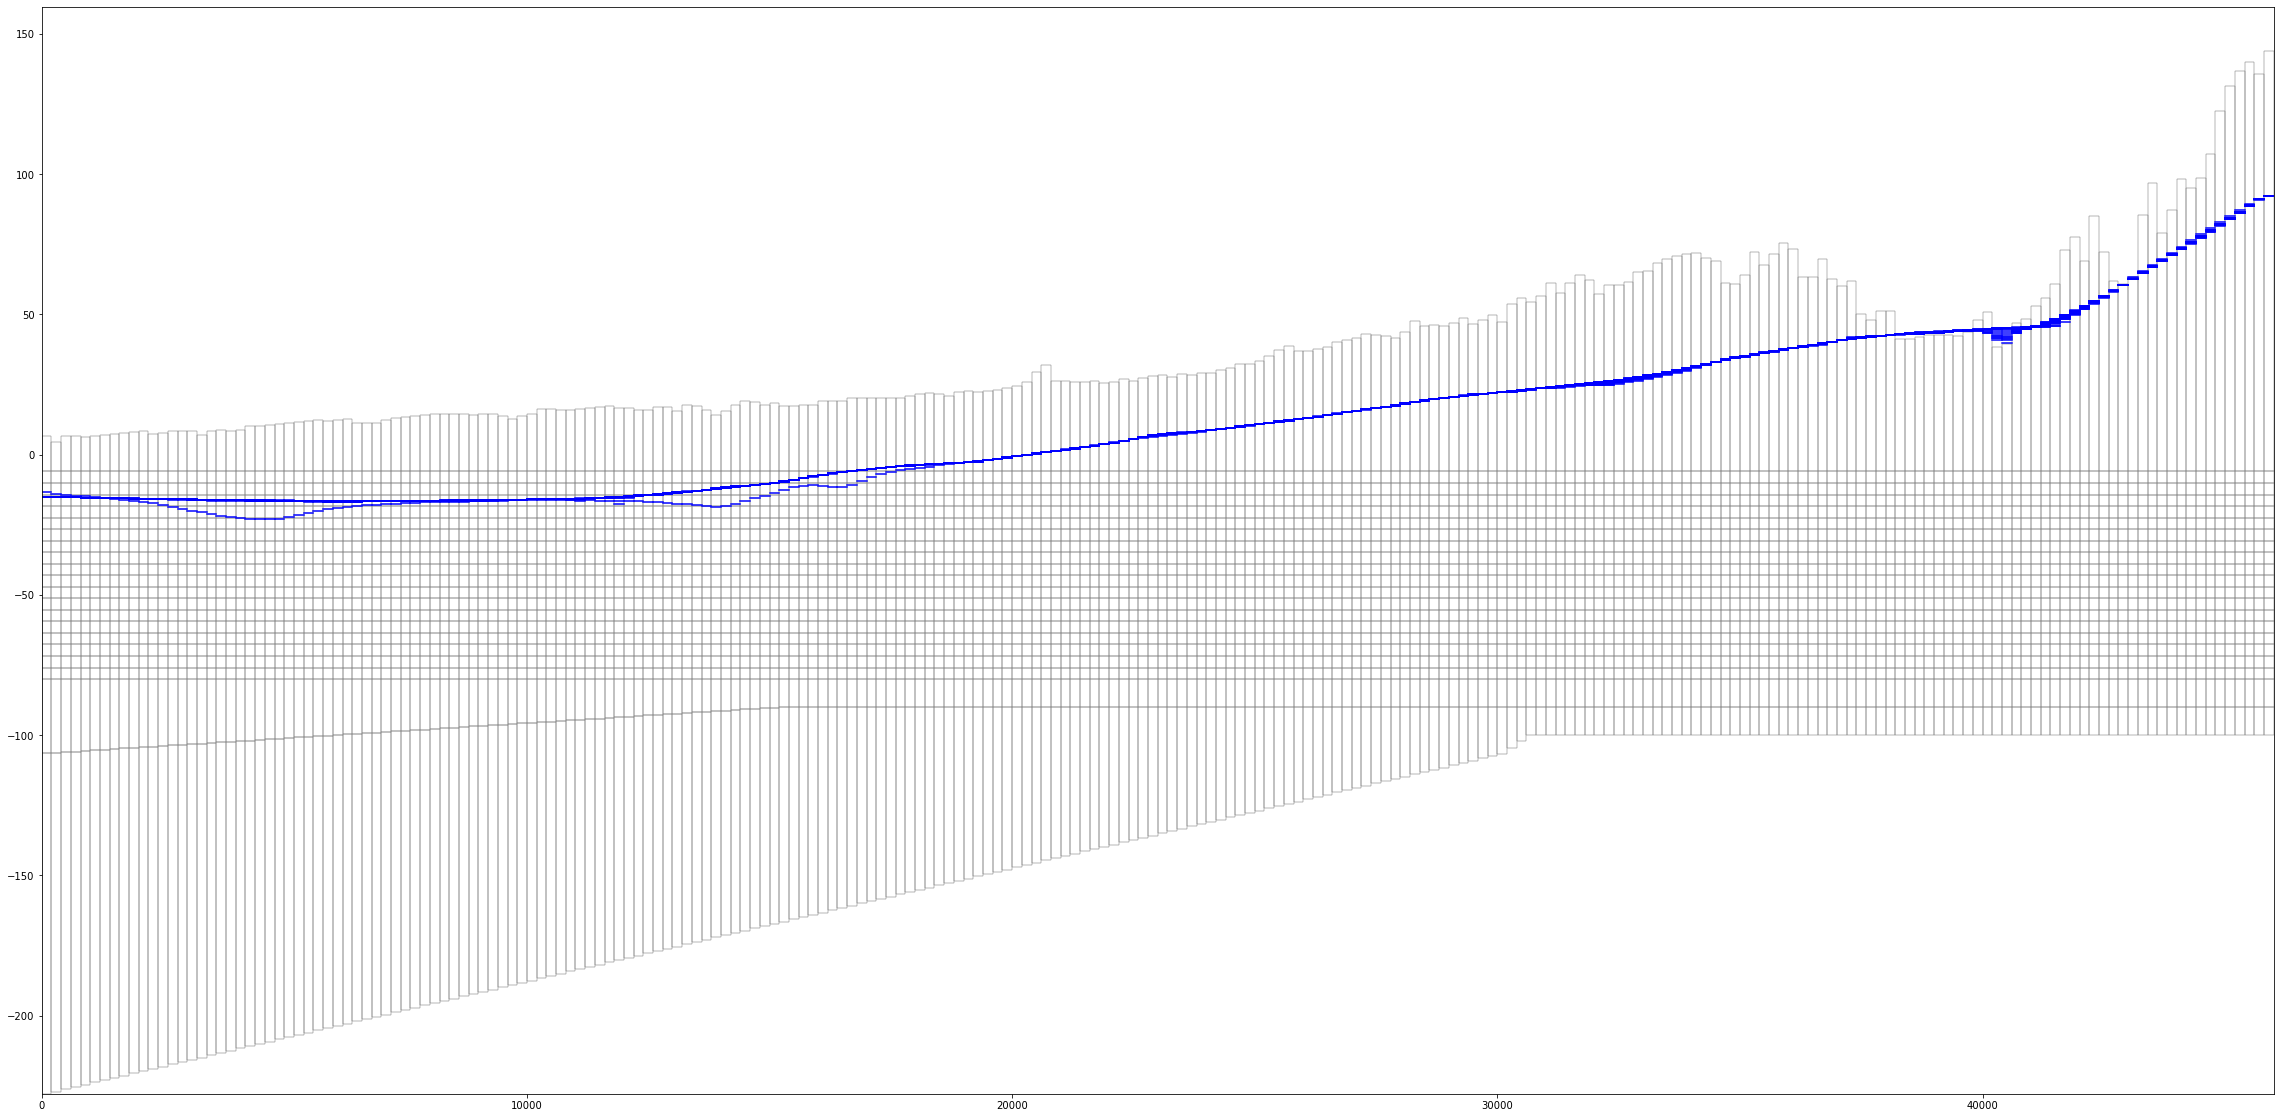

In [54]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(1, 1, 1)

head = hdobj.get_data(kstpkper = spd_stp[0])
head.shape
# head[:,rownum,:].shape

rownum = 80
mcs = flopy.plot.PlotCrossSection(model=m, line={'Row' : rownum})
linecollection = mcs.plot_grid(linewidth = 0.3)
ax.add_collection(linecollection)
# mcs.contour_array(a=head)
# mcs.plot_array(a=head)

wt = mcs.plot_surface(a=head[:,:,:])


# SFR OUT Plotting

In [154]:
sfr_cols = ['name','row','column','segment', 'reach', 'Qin', 'Qaquifer', 'Qout',
            'stage', 'depth', 'width', 'Cond', 'gradient', 'kstpkper']

In [155]:
sfrdf_all = pd.DataFrame(columns = sfr_cols)
sfrdf_all.index.name = 'name'

for i in np.arange(0,len(runs)):
    sfrnam = loadpth+runs[i]+'/MF.sfr.out'
    sfrout = flopy.utils.SfrFile(sfrnam)
    sfrdf = sfrout.get_dataframe()
    sfrdf['name'] = runs[i]
    sfrdf_all = sfrdf_all.append(sfrdf.loc[:,sfr_cols])

In [156]:
sfrdf_end = sfrdf_all.loc[sfrdf_all.kstpkper == (0,20)]
sfrdf_end['seg_reach'] = list(zip(sfrdf_end.loc[:,['segment','reach']].values))

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [157]:
pd_sfr = pd.DataFrame(grid_sfr.set_index(['row','column']).loc[:,['length_m','z']])
pd_sfr['Total distance (m)'] = pd_sfr['length_m'].cumsum()

In [158]:
sfrdf_plot = pd_sfr.join(sfrdf_end.set_index(['row','column']),on=['row','column'],how='inner',lsuffix='_all')
sfrdf_plot['Qin_cfs'] = sfrdf_plot.Qin /(0.3048**3)/86400
sfrdf_plot['Qaquifer_AF'] = sfrdf_plot.Qaquifer /(0.3048**3)/43560

In [159]:
# temp = sfrdf_plot.loc[sfrdf_plot.name=='actual_0025cfs']
# temp = temp.loc[(temp.segment>13)&(temp.segment<21)]
# # temp.plot(x='Total distance (m)',y='Qin')
# temp.plot(x='segment',y='Qin')

Text(0, 0.5, 'Streambed seepage (AF/day)')

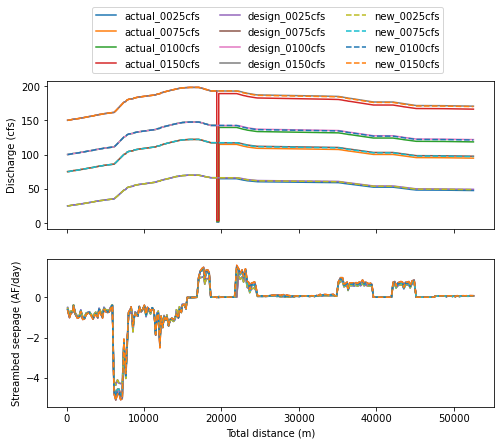

In [160]:
fig,ax=plt.subplots(2,1,figsize=(8,6),sharex=True)
for i in sfrdf_plot.name.unique():
    typ='-'
    if 'new' in i:
        typ='--'
#     elif 'actual' in i:
#         typ = '-*'
    sfrdf_plot.loc[sfrdf_plot.name==i].plot(ax=ax[0],x='Total distance (m)',y='Qin_cfs',label=i,legend=False, style=typ)
    sfrdf_plot.loc[sfrdf_plot.name==i].plot(ax=ax[1],x='Total distance (m)',y='Qaquifer_AF',label=i,legend=False, style=typ)

# plt.legend(orientation='horizontal')
ax[0].legend(loc=[0.1,1.05],ncol=3)
ax[0].set_ylabel('Discharge (cfs)')
ax[1].set_ylabel('Streambed seepage (AF/day)') #($m^3$/d)

# plt.savefig(plt_dir+'/streamflow between scenarios '+model_type+'.png',dpi=600,bbox_inches='tight')

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


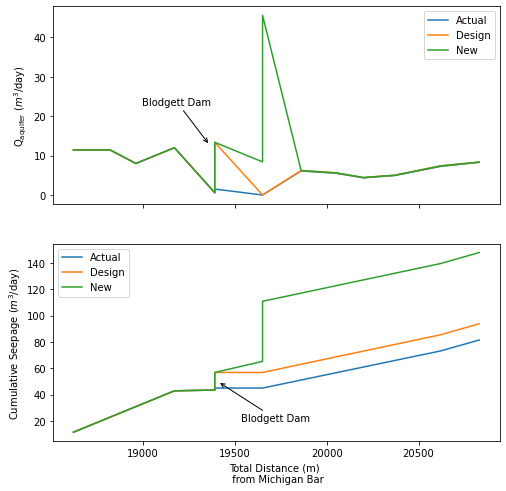

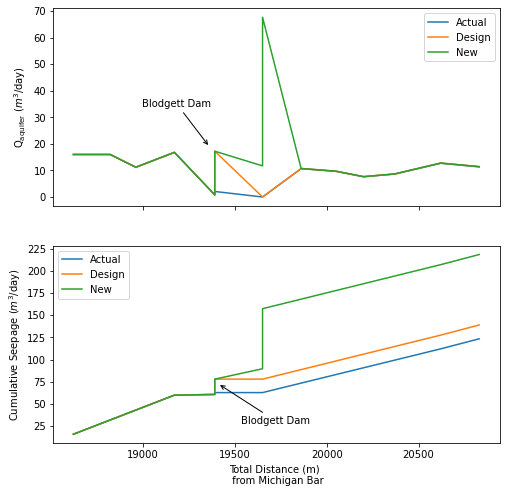

In [162]:

for flow in ['0025','0100']:
    fig,axes = plt.subplots(2,1,figsize=(8,8),sharex=True)

    ax=axes[0]
    flownam = '_'+flow+'cfs'
    if75 = (sfrdf_plot.name=='actual'+flownam) |(sfrdf_plot.name=='design'+flownam)|(sfrdf_plot.name=='new'+flownam)
    sfrdf_75 = sfrdf_plot.loc[if75]
    sfrdf_75_dam = sfrdf_75.loc[(sfrdf_75['Total distance (m)']>18600 ) &(sfrdf_75['Total distance (m)']<21000)]

    # sfrdf_75_dam.Qaquifer = sfrdf_75_dam.groupby('name').cumsum().Qaquifer
    sfrdf_75_dam.groupby('name').plot(x = 'Total distance (m)',y='Qaquifer',ax=ax)

    ax.legend(['Actual','Design','New'])
    ax.set_ylabel('$\mathregular{Q_{aquifer}}$ ($m^3$/day)')

    ax.annotate("Blodgett Dam", xy=(0.35, 0.3), xytext=(0.2,0.5), xycoords="axes fraction",
               arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))

    ax=axes[1]
    # filter out just 75 cfs scenario for comparison
    if75 = (sfrdf_plot.name=='actual'+flownam) |(sfrdf_plot.name=='design'+flownam)|(sfrdf_plot.name=='new'+flownam)
    sfrdf_75 = sfrdf_plot.loc[if75]
    sfrdf_75_dam = sfrdf_75.loc[(sfrdf_75['Total distance (m)']>18600 ) &(sfrdf_75['Total distance (m)']<21000)]

    # fig,ax = plt.subplots(figsize=(6,6))
    sfrdf_75_dam.Qaquifer = sfrdf_75_dam.groupby('name').cumsum().Qaquifer
    sfrdf_75_dam.groupby('name').plot(x = 'Total distance (m)',y='Qaquifer',ax=ax)

    ax.legend(['Actual','Design','New'])
    ax.set_ylabel('Cumulative Seepage ($m^3$/day)')
    ax.set_xlabel('Total Distance (m) \n from Michigan Bar')

    ax.annotate("Blodgett Dam", xy=(0.37, 0.3), xytext=(0.42,0.1), xycoords="axes fraction",
               arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
#     plt.savefig(plt_dir+'sfr stream seepage all'+flownam+'.png',dpi=600,bbox_inches='tight')

In [30]:
# gage file output
#Option 0: Use standard default listing of time, stage, volume, and concentration.
#Option 1: Default values plus all inflows to and outflows from lake (as volumes during time increment),
#total lake conductance, and time-step budget error (percent).
#Computed runoff from UZF and lake infiltration to UZF is added whenever the UZF Package is active 
gage_cols = ['time','stage','volume','conc','inflows','outflows','conductance','error']

In [31]:
runs[0:8]

['actual_0025cfs',
 'actual_0075cfs',
 'actual_0100cfs',
 'actual_0150cfs',
 'design_0025cfs',
 'design_0075cfs',
 'design_0100cfs',
 'design_0150cfs']

In [32]:
def read_gage(run):
    gagenam = loadpth+run+'/MF.gage1.go'
    gage = pd.read_csv(gagenam,skiprows=1, delimiter = '\s+', engine='python')
    cols = gage.columns[1:-1]
    gage = gage.dropna(axis=1)
    gage.columns = cols
    gage['name'] = run
    return(gage)

gage = read_gage(runs[0])

for i in np.arange(1,len(runs[0:8])):
    go = read_gage(runs[i])
    gage = gage.append(go)


In [33]:
# get last period, all is basically the same
gage = gage.loc[gage.Time == gage.Time.max()]

gage['Inflw_cfs'] = gage['SW-Inflw']*6 /(0.3048**3)/86400

gage['Seepage_cfs']  = gage['GW-Outflw']*6 /(0.3048**3)/86400

gage

Time   Stage(H)      Volume  Vol.Change  Precip.  Evap.  Runoff  \
126  20.999992  22.165216   8249.7959    0.000000      0.0    0.0     0.0   
126  20.999992  22.187709   8351.8867    0.000000      0.0    0.0     0.0   
126  20.999992  22.198790   8402.3125    0.000000      0.0    0.0     0.0   
126  20.999992  22.218345   8491.4502    0.000000      0.0    0.0     0.0   
126  20.999992  22.719283  10836.5660    0.005859      0.0    0.0     0.0   
126  20.999992  22.812717  11281.6770   -0.023438      0.0    0.0     0.0   
126  20.999992  22.848950  11454.5500   -0.011719      0.0    0.0     0.0   
126  20.999992  22.910878  11750.1150    0.029297      0.0    0.0     0.0   

     GW-Inflw  GW-Outflw     SW-Inflw    SW-Outflw  Withdrawal  Lake-Inflx  \
126       0.0  347.23108    3233.9126    2886.6814         0.0         0.0   
126       0.0  340.90588    5736.3550    5395.4492         0.0         0.0   
126       0.0  339.73593    6971.1050    6631.3691         0.0         0.0   
126       0.0  338.11557    9438.6631    9100.5479         0.0         0.0   
126       0.0  363.35391  161652.6400  161289.2800         0.0         0.0   
126       0.0  359.33896  286743.7500  286384.4400         0.0         0.0   
126       0.0  358.85498  348484.2200  348125.3800         0.0         0.0   
126       0.0  358.44162  471866.0000  471507.5300         0.0         0.0   

     Total-Cond  Percent-Err            name    Inflw_cfs  Seepage_cfs  
126         0.0     0.000011  actual_0025cfs     7.930871     0.851552  
126         0.0     0.000000  actual_0075cfs    14.067880     0.836040  
126         0.0    -0.000011  actual_0100cfs    17.095990     0.833171  
126         0.0     0.000000  actual_0150cfs    23.147447     0.829197  
126         0.0     0.000004  design_0025cfs   396.438132     0.891092  
126         0.0    -0.000008  design_0075cfs   703.212498     0.881246  
126         0.0    -0.000003  design_0100cfs   854.625284     0.880059  
126         0.0    -0.000006  design_0150cfs  1157.207676     0.879045

In [34]:
def calc_lak_out(C, n, slope, lak_stage, str_top, width):
    # is either 1.486 for cfs or 1 for cms or 86400 for cmd
    flow = (C/n)*width*(((lak_stage-str_top)*(2/3))**(5/3))*((slope)**(1/2))
    return(flow)
dam_str_top = 22.111436
# dam_str_top = 21.92
dam_slope = 0.0003
# dam_slope = 0.0008
dam = calc_lak_out(86400,0.048,dam_slope,22.594511, dam_str_top,20)

s1 = (124.5-116.5)/(1000*6+500+750)
s2 = (114.85-110.65)/(1000*4+559*2)
s1,s2
ex1 = calc_lak_out(C=1.486*86400,n = 0.05,slope = s2,lak_stage=118.10,str_top = 114.85,width=5)
dam, ex1

(94348.56532363672, 1334321.7323914967)

In [35]:
sfrdf_plot.loc[(sfrdf_plot.segment==1)&(sfrdf_plot.reach==1)]

NameError: name 'sfrdf_plot' is not defined

In [169]:
sfrdf_plot.loc[sfrdf_plot.segment==16]

length_m          z  Total distance (m)            name segment  \
row  column                                                                    
53.0 151.0        260  23.111436               19650  actual_0025cfs      16   
     151.0        260  23.111436               19650  actual_0075cfs      16   
     151.0        260  23.111436               19650  actual_0100cfs      16   
     151.0        260  23.111436               19650  actual_0150cfs      16   
     151.0        260  23.111436               19650  design_0025cfs      16   
     151.0        260  23.111436               19650  design_0075cfs      16   
     151.0        260  23.111436               19650  design_0100cfs      16   
     151.0        260  23.111436               19650  design_0150cfs      16   
     151.0        260  23.111436               19650     new_0025cfs      16   
     151.0        260  23.111436               19650     new_0075cfs      16   
     151.0        260  23.111436               19650     new_0100cfs      16   
     151.0        260  23.111436               19650     new_0150cfs      16   

            reach       Qin  Qaquifer      Qout    stage    depth   width  \
row  column                                                                 
53.0 151.0      1    2886.7    0.0000    2886.7  22.1653  0.05387   12.36   
     151.0      1    5395.4    0.0000    5395.4  22.1897  0.07830   12.52   
     151.0      1    6631.4    0.0000    6631.4  22.2000  0.08857   12.59   
     151.0      1    9100.5    0.0000    9100.5  22.2184  0.10700   12.71   
     151.0      1  161290.0    0.0000  161290.0  22.6816  0.57010   85.23   
     151.0      1  286380.0    0.0000  286380.0  22.7744  0.66300  102.40   
     151.0      1  348130.0    0.0000  348130.0  22.8100  0.69860  107.20   
     151.0      1  471510.0    0.0000  471510.0  22.8725  0.76110  115.70   
     151.0      1  161720.0    8.4059  161720.0  22.9863  0.87480   76.22   
     151.0      1  286860.0   11.1470  286850.0  23.0943  0.98280   96.74   
     151.0      1  348610.0   11.7160  348600.0  23.1313  1.02000  100.20   
     151.0      1  472000.0   12.0660  471990.0  23.1915  1.08000  100.80   

              Cond  gradient kstpkper   seg_reach     Qin_cfs  Qaquifer_AF  
row  column                                                                 
53.0 151.0   0.000     1.035  (0, 20)  ([16, 1],)    1.179894     0.000000  
     151.0   0.000     1.051  (0, 20)  ([16, 1],)    2.205286     0.000000  
     151.0   0.000     1.058  (0, 20)  ([16, 1],)    2.710482     0.000000  
     151.0   0.000     1.070  (0, 20)  ([16, 1],)    3.719689     0.000000  
     151.0   0.000     1.374  (0, 20)  ([16, 1],)   65.924799     0.000000  
     151.0   0.000     1.435  (0, 20)  ([16, 1],)  117.053406     0.000000  
     151.0   0.000     1.458  (0, 20)  ([16, 1],)  142.292765     0.000000  
     151.0   0.000     1.499  (0, 20)  ([16, 1],)  192.722436     0.000000  
     151.0   3.502     1.573  (0, 20)  ([16, 1],)   66.100554     0.006815  
     151.0   4.444     1.644  (0, 20)  ([16, 1],)  117.249598     0.009037  
     151.0   4.603     1.669  (0, 20)  ([16, 1],)  142.488958     0.009498  
     151.0   4.631     1.708  (0, 20)  ([16, 1],)  192.922716     0.009782

## XS Plotting

In [4]:
# designed scenario flow through dam only
design_xs = pd.read_csv(gwfm_dir+'/Blodgett_Dam/geospatial/02_designed_XS.csv', skiprows=1)
# current situation, flow around dam and after dam
actual_xs = pd.read_csv(gwfm_dir+'/Blodgett_Dam/geospatial/03_actual_XS.csv', skiprows=1)
# remove XS for at dam
actual_xs = actual_xs.iloc[:,:6]
# depending scenario, use different input cross sections for 16.5
new_xs = pd.read_csv(gwfm_dir+'/Blodgett_Dam/geospatial/01_New_wide_XS.csv', skiprows=1)

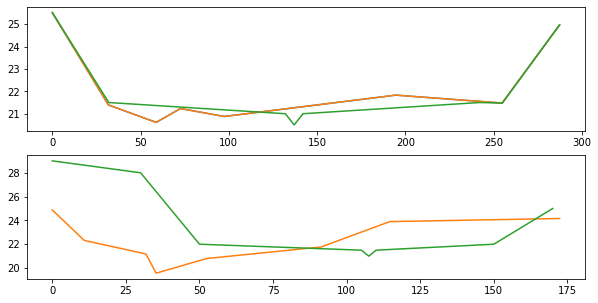

In [51]:
# 

# all_xs = design_xs.assign(id_col='Design').append(actual_xs.assign(id_col='Actual')).append(new_xs.assign(id_col='New'))
# all_xs = all_xs.set_index('id_col')
# fig,ax = plt.subplots(2,1, figsize=(10,5))

# for c, i in enumerate(np.arange(2,6,2)):
#     for n in all_xs.index.unique():
#         plt_xs = all_xs.loc[all_xs.index==n,:]
# #         print(plt_xs)
#         ax[c].plot(plt_xs.iloc[:,i],plt_xs.iloc[:,i+1])
# plt.legend(['Designed'])

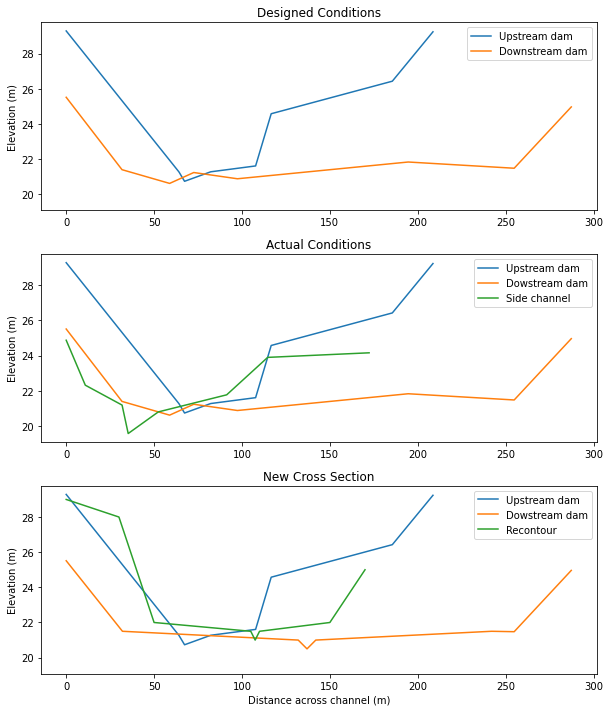

In [38]:
fig,ax=plt.subplots(3,1,figsize=(15,10),sharey=True)
for i in np.arange(0,3):
    ax[i].set_aspect(10)
    ax[i].set_ylabel("Elevation (m)")

for i in np.arange(0,len(new_xs.columns),2):
    ax[2].plot(new_xs.iloc[:,i],new_xs.iloc[:,i+1], label=new_xs.columns[i])
ax[2].legend(['Upstream dam','Dowstream dam','Recontour'])
ax[2].set_title('New Cross Section')

for i in np.arange(0,len(actual_xs.columns),2):
    ax[1].plot(actual_xs.iloc[:,i],actual_xs.iloc[:,i+1], label=actual_xs.columns[i])
ax[1].legend(['Upstream dam','Dowstream dam','Side channel'])
ax[1].set_title('Actual Conditions')

for i in np.arange(0,len(design_xs.columns),2):
    ax[0].plot(design_xs.iloc[:,i],design_xs.iloc[:,i+1], label=design_xs.columns[i])
ax[0].legend(['Upstream dam','Downstream dam'])
ax[0].set_title('Designed Conditions')


# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Distance across channel (m)')


fig.tight_layout()
plt.savefig(plt_dir+'/different_scenario_XS.png',dpi=600,bbox_inches='tight')

## Annual sum water budget

In [ ]:
def annual_WB(zb_annual,unit, zon):
    # if unit = AF convert units, else leave as m3
    if unit == 'AF':
        # ((1 ft/ 0.3048 m)^3) * (1 acre/43560 ft2)
        zb_annual = zb_annual/((0.3048**3) *43560)
    if zon == 'valley':
        cols = [ 'FROM_RECHARGE', 'FROM_ZONE_0', 'TO_ZONE_0', 'TO_WELLS']        
    elif zon == 'all':
        cols = ['FROM_CONSTANT_HEAD', 'FROM_GHB', 'FROM_RECHARGE', 'TO_CONSTANT_HEAD', 'TO_GHB', 'TO_WELLS']

    #fixes issues with line and bar plotting
    zb_annual.index = zb_annual.index.astype(str)
    
    fig, ax = plt.subplots(figsize=(16,6))
    # clean up x axis so there are not as many dates
    # ax.xaxis.set_major_locator(mdates.MonthLocator())
    zb_annual.plot(y=['dSTORAGE'],ax=ax, color = 'black')
    # define columns to plot
    
    # plot acre ft instead of meters
    zb_annual.plot(y= cols,
               kind='bar',ax=ax, stacked = True)
    plt.ylabel('Flux (ac-ft/year)')

    zb_annual.plot(y=['SUM_dSTORAGE'],ax=ax, secondary_y = True,rot=90)
    plt.xticks(rotation=90)
    ax.yaxis.set_major_locator(MaxNLocator(5)) 

    plt.ylabel('Flux (ac-ft/year)')
    plt.xlabel('Datetime')
    plt.title('Water Budget for Butte Valley')
    plt.savefig(m.model_ws+'/Plots/annualsum_WB_'+zon+'_'+unit+'.png',dpi=300,bbox_inches = 'tight')
    zb_annual.to_csv(m.model_ws+'/Plots/annualsum_WB_'+zon+'_'+unit+'.csv')

In [ ]:
annual_WB(zb_annual118,unit = 'AF',zon='valley')
annual_WB(zb_annual,unit = 'AF',zon='all')

In [ ]:
def monthly_WB(zb_df,unit, zon, wy,name):
    plt_strt = pd.to_datetime(str(wy-1)+'-10-01')
    plt_end = pd.to_datetime(str(wy)+'-9-30')
    zb_plot = zb_df.loc[(zb_df.index>plt_strt)&(zb_df.index<plt_end)]
    zb_plot.index = zb_plot.index.astype(str)
    # if unit = AF convert units, else leave as m3
    if unit == 'AF':
        # ((1 ft/ 0.3048 m)^3) * (1 acre/43560 ft2)
        zb_plot = zb_plot/((0.3048**3) *43560)
    if zon == 'valley':
        cols = [ 'FROM_RECHARGE', 'FROM_ZONE_0', 'TO_ZONE_0', 'TO_WELLS']        
    elif zon == 'all':
        cols = ['FROM_CONSTANT_HEAD', 'FROM_GHB', 'FROM_RECHARGE', 'TO_CONSTANT_HEAD', 'TO_GHB', 'TO_WELLS']

    #fixes issues with line and bar plotting
    zb_plot.index = zb_plot.index.astype(str)
    
    fig, ax = plt.subplots(figsize=(16,6))
    # clean up x axis so there are not as many dates
    # ax.xaxis.set_major_locator(mdates.MonthLocator())
    zb_plot.plot(y=['dSTORAGE'],ax=ax, color = 'black')
    ax.hlines(y=0, xmin = -1, xmax = 100, color = 'black')

    # plot acre ft instead of meters
    zb_plot.plot(y= cols,
               kind='bar',ax=ax, stacked = True)
    plt.ylabel('Flux (ac-ft/month)')

    zb_plot.plot(y=['SUM_dSTORAGE'],ax=ax, secondary_y = True,rot=90)
    plt.xticks(rotation=90)
    ax.yaxis.set_major_locator(MaxNLocator(5)) 

    plt.ylabel('Flux (ac-ft/month)')
    plt.xlabel('Datetime')
    plt.title('Water Budget for Butte Valley WY'+str(wy)+' - '+name+' Year' )
    plt.savefig(m.model_ws+'/Plots/'+name+'_'+str(wy)+'monthlyWB_'+zon+'_'+unit+'.png',dpi=300,bbox_inches = 'tight')

In [ ]:
monthly_WB(zb_df_mon,unit='AF', zon='all', wy=1999,name='Wet')
monthly_WB(zb_df_mon,unit='AF', zon='all', wy=2005,name='Avg')
monthly_WB(zb_df_mon,unit='AF', zon='all', wy=2014,name='Dry')